# Model Tuning

Parameter tuning for Support Vectors classifier

# 1)-Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# What's life without style :). So, let's add style to our dataframes
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
# For data processing and modeling
import numpy as np
import pandas as pd
from sklearn import svm, datasets
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# 2)-Loading data


In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:, :2]
y = iris.target

# 3)- Model

In [6]:
def plotSVC(title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
    
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

# 4)- Model Tuning

### 4a)-Kernel
kernel parameters selects the type of hyperplane used to separate the data. Using 'linear' will use a linear hyperplane (a line in the case of 2D data). 'rbf' and 'poly' uses a non linear hyper-plane

In [7]:
kernels = ['linear', 'rbf', 'poly']

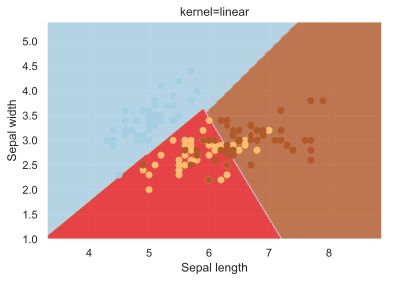

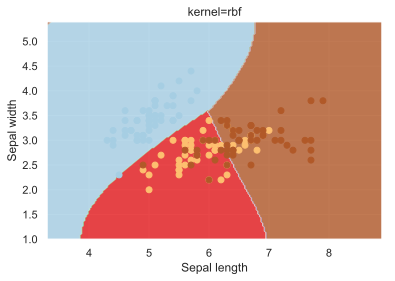

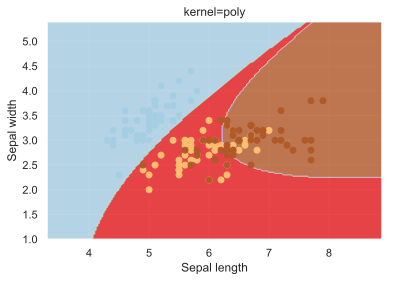

In [8]:
for kernel in kernels:
    svc = svm.SVC(kernel=kernel).fit(X, y)
    plotSVC('kernel=' + str(kernel))

### 4b)-gamma
gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set

In [9]:
gammas = [0.1, 1, 10, 100]

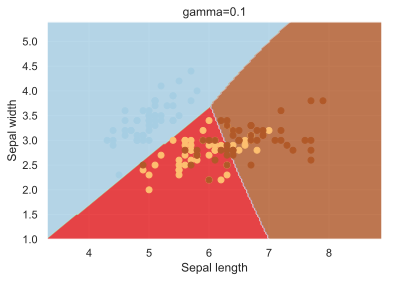

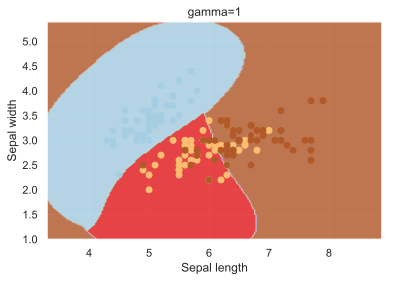

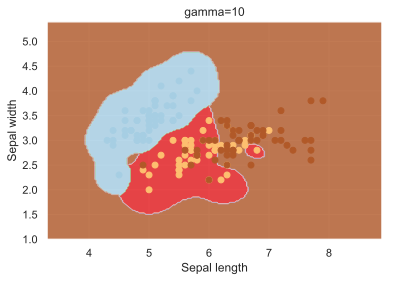

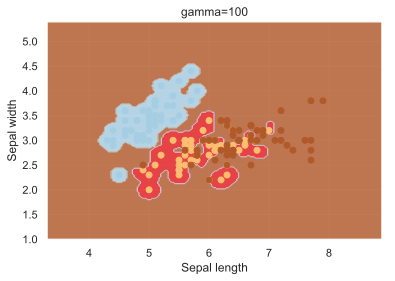

In [10]:
for gamma in gammas:
    svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
    plotSVC('gamma=' + str(gamma))

We can see that increasing gamma leads to overfitting as the classifier tries to perfectly fit the training data

### 4c)-C
C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

In [11]:
cs = [0.1, 1, 10, 100, 1000]

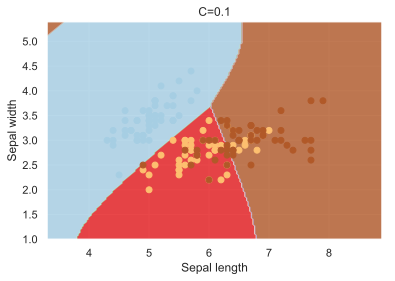

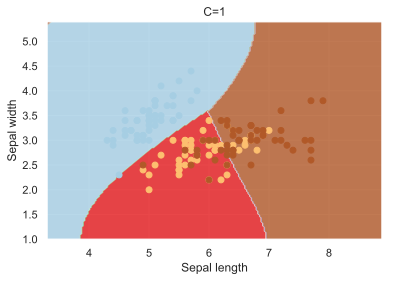

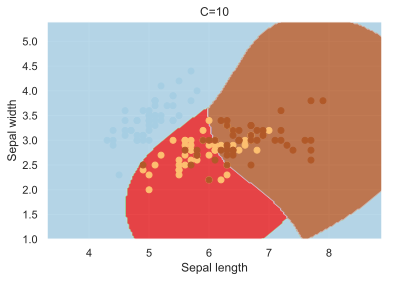

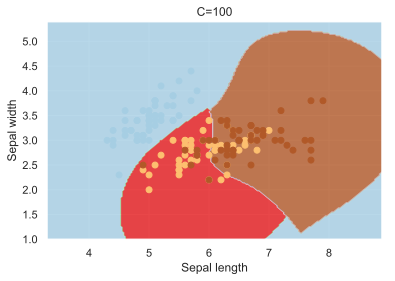

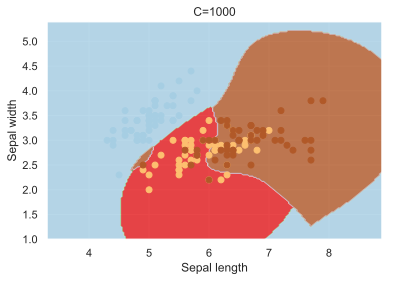

In [12]:
for c in cs:
    svc = svm.SVC(kernel='rbf', C=c).fit(X, y)
    plotSVC('C=' + str(c))

Increasing C values may lead to overfitting the training data.

### 4d)- degree
degree is a parameter used when kernel is set to 'poly'. It's basically the degree of the polynomial used to find the hyperplane to split the data

In [13]:
degrees = [0, 1, 2, 3, 4, 5, 6]

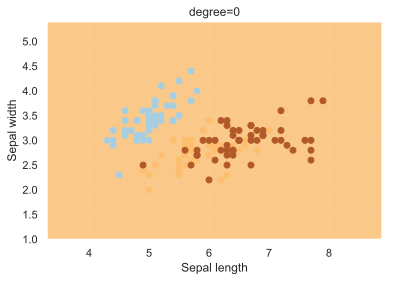

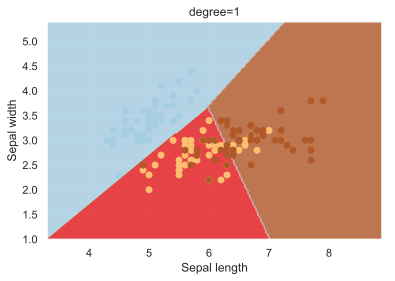

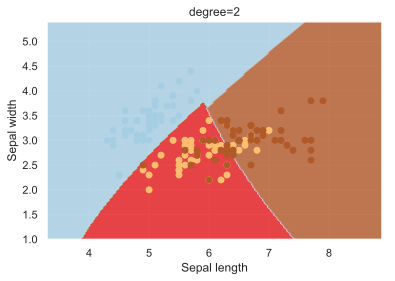

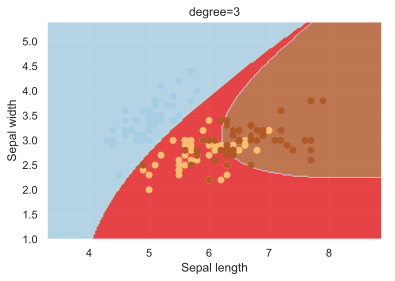

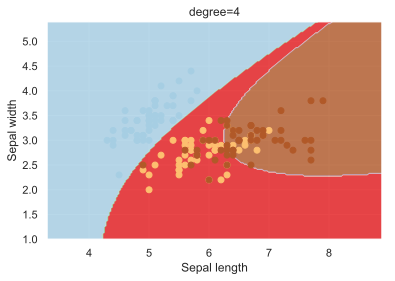

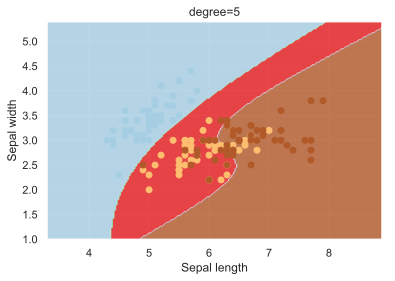

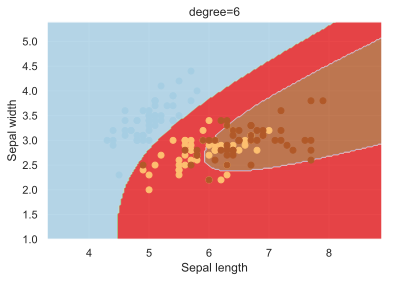

In [14]:
for degree in degrees:
    svc = svm.SVC(kernel='poly', degree=degree).fit(X, y)
    plotSVC('degree=' + str(degree))

Used degree=1 is the same as using a 'linear' kernel. Also, increasing this parameters leads to higher training times.